# Método de Shooting

**Ejemplo:** Resolver, mediante método de "shooting", la siguiente ecuación diferencial: \\
d^2x/dt^2 + 3x = 0, con x(0) = 7 y x(2pi) = 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
def f(t,y):
  eq1 = y[1]
  eq2 = -3 * y[0]
  return [eq1,eq2]

In [ ]:
u = 0.1  # Condición inicial para velocidad, es un parámetro que vamos tanteando hasta obtener la solución de problema
y0 = [7,u]  # Condiciones iniciales de posición y velocidad (que al final debe satisfacer la condición de frontera de posición)
t_span = [0,2*np.pi]

t_eval = np.linspace(t_span[0],t_span[1],1000)
sol = solve_ivp(f,t_span,y0,t_eval=t_eval)

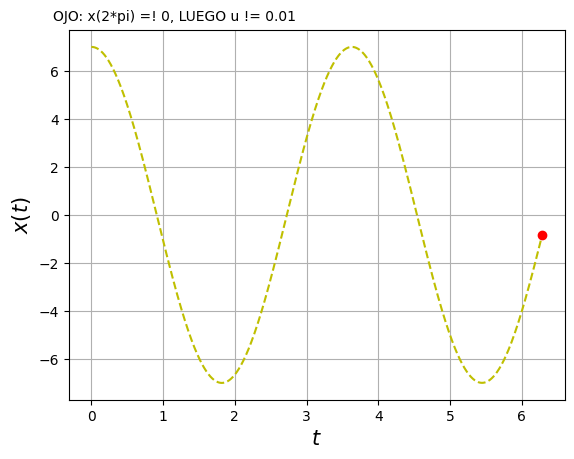

In [ ]:
plt.plot(sol.t,sol.y[0],'--y')
plt.plot(sol.t[-1],sol.y[0][-1],'ro')
plt.xlabel('$t$',size=15)
plt.ylabel(r'$x(t)$',size=15)
plt.figtext(0.1,0.90,'OJO: x(2*pi) =! 0, LUEGO u != 0.01')
plt.grid()
plt.show()

In [28]:
def Shooting(u):
  y0 = [7,u]
  t_span = [0,2*np.pi]
  t_eval = np.linspace(t_span[0],t_span[1],1000)
  sol = solve_ivp(f,t_span,y0,t_eval=t_eval)
  return sol.y[0][-1]

In [30]:
Shooting=np.vectorize(Shooting)  # Vectoriza la función para poder evaluar listas con ella

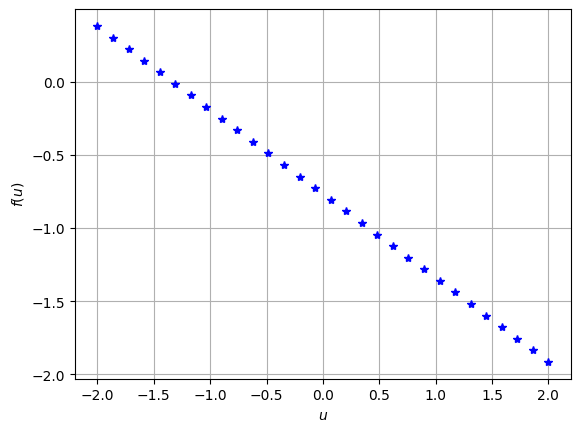

In [33]:
U = np.linspace(-2,2,30)
plt.plot(U,Shooting(U),'b*')
plt.ylabel(r'$f(u)$')
plt.xlabel(r'$u$')
plt.grid()
plt.show()

In [40]:
# Para encontrar el valor exacto de u donde f(u) = 0 (donde f(u) indica la coordenada y de la condición de frontera de la EDO), usamos método de bisección

a = -2
b= 2
for i in range(20):
  c = 0.5*(a+b)
  if Shooting(a)*Shooting(c)<0:
    b = c
  else:
    a = c

In [47]:
y0 = [7,c]
t_span = [0,2*np.pi]

t_eval = np.linspace(t_span[0],t_span[1],1000)
sol = solve_ivp(f,t_span,y0,t_eval=t_eval)

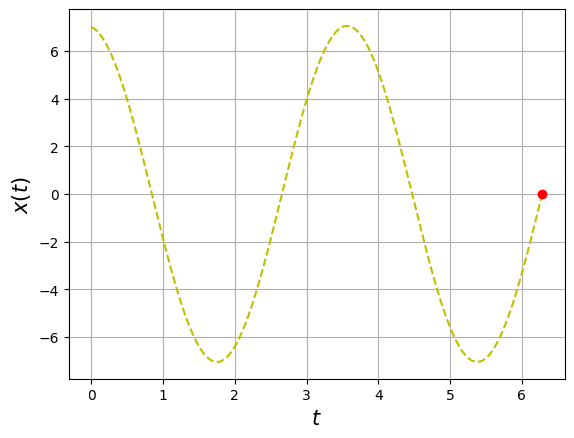

In [48]:
plt.plot(sol.t,sol.y[0],'--y')
plt.plot(sol.t[-1],sol.y[0][-1],'ro')
plt.xlabel('$t$',size=15)
plt.ylabel(r'$x(t)$',size=15)
plt.grid()
plt.show()